In [1]:
%reload_ext autoreload
%autoreload 2

# Imports

In [2]:
from kret_notebook import *  # NOTE import first
from kret_lgbm._core.lgbm_nb_imports import *
from kret_lightning._core.lightning_nb_imports import *
from kret_matplotlib._core.mpl_nb_imports import *
from kret_np_pd._core.np_pd_nb_imports import *
from kret_optuna._core.optuna_nb_imports import *
from kret_polars._core.polars_nb_imports import *
from kret_rosetta._core.rosetta_nb_imports import *
from kret_sklearn._core.sklearn_nb_imports import *
from kret_torch_utils._core.torch_nb_imports import *
from kret_tqdm._core.tqdm_nb_imports import *
from kret_type_hints._core.types_nb_imports import *
from kret_utils._core.utils_nb_imports import *

# from kret_wandb._core.wandb_nb_imports import *  # NOTE this is slow to import

[kret_np_pd._core.np_pd_nb_imports] Imported kret_np_pd._core.np_pd_nb_imports in 0.0224 seconds
Loaded environment variables from /Users/Akseldkw/coding/kretsinger/.env
[kret_lgbm._core.lgbm_nb_imports] Imported kret_lgbm._core.lgbm_nb_imports in 0.0007 seconds
[kret_lightning._core.lightning_nb_imports] Imported kret_lightning._core.lightning_nb_imports in 0.0032 seconds
[kret_matplotlib._core.mpl_nb_imports] Imported kret_matplotlib._core.mpl_nb_imports in 0.0745 seconds
[kret_optuna._core.optuna_nb_imports] Imported kret_optuna._core.optuna_nb_imports in 0.0002 seconds
[kret_polars._core.polars_nb_imports] Imported kret_polars._core.polars_nb_imports in 0.0784 seconds
[kret_rosetta._core.rosetta_nb_imports] Imported kret_rosetta._core.rosetta_nb_imports in 0.0000 seconds
[kret_sklearn._core.sklearn_nb_imports] Imported kret_sklearn._core.sklearn_nb_imports in 0.1319 seconds
[kret_torch_utils._core.torch_nb_imports] Imported kret_torch_utils._core.torch_nb_imports in 0.4648 seconds


# Load Data

In [3]:
from kret_lightning.examples.cifar10_module import *
from kret_lightning.examples.cifar10_datamodule import *

In [4]:
cifar_dm = CIFAR10DataModule(UKS_CONSTANTS.DATA_DIR / "CIFAR10", batch_size=64, num_workers=8)

In [5]:
cifar_dm.setup("fit")

In [6]:
len(cifar_dm.train_dataloader())

704

# Implementation

In [7]:
## Define the CNN model
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32 * 2, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=128 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm2d(32 * 2)
        self.bn2 = nn.BatchNorm2d(128 * 2)
        self.bn3 = nn.BatchNorm2d(256 * 2)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout2d(0.2)

        self.fc1 = nn.Linear(4096 * 2, 4096 * 2)
        self.fc2 = nn.Linear(4096 * 2, 2048 * 2)
        self.fc3 = nn.Linear(2048 * 2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.relu(self.bn3(self.conv7(x)))
        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


# Instantiating the network and printing its architecture
num_classes = 10
net = AdvancedCNN(num_classes)
print(net)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

AdvancedCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool)

In [8]:
print(f"Params:  {count_parameters(net):,}")

Params:  108,316,554


In [9]:
cifar_nn = CIFAR10ResNet()

Saving hparams, ignoring ()
Saving hparams, ignoring ()


In [10]:
print(f"Params:  {count_parameters(cifar_nn):,}")

Params:  2,777,674


# Sandbox

In [11]:
from torchview import ComputationGraph, draw_graph

batch_size = 1
# device='meta' -> no memory is consumed for visualization
model_graph: ComputationGraph = draw_graph(
    cifar_nn, input_size=(batch_size, 3, 32, 32), device="mps", expand_nested=True
)

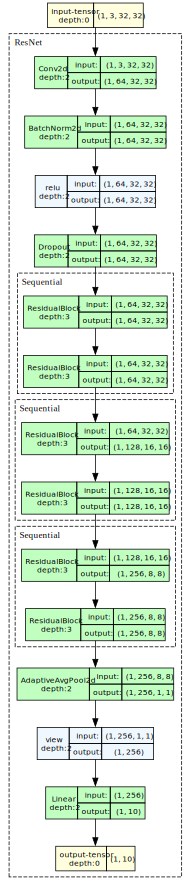

In [12]:
model_graph.visual_graph

In [14]:
cifar_nn.name

'CIFAR10ResNet__lr=0.001--warmup=0.1--patience=10--num_blocks=2--num_filters=64--dropout_rate=0.3--num_classes=10'

In [ ]:
os.mkdir(
    UKS_CONSTANTS.TORCH_MODEL_VIZ_DIR,
)

In [18]:
cifar_nn.eval().to("cpu")
# raise ValueError("STOP")
dummy_input = torch.randn(1, 3, 32, 32)  # adjust shape to your model

torch.onnx.export(
    cifar_nn,
    dummy_input,
    UKS_CONSTANTS.TORCH_MODEL_VIZ_DIR / f"{cifar_nn.name}.onnx",
    export_params=True,
    opset_version=20,
    do_constant_folding=True,
    # input_names=["input"],
    # output_names=["output"],
    # dynamic_axes={
    #     "input": {0: "batch_size"},
    #     "output": {0: "batch_size"},
    # },
)

[torch.onnx] Obtain model graph for `CIFAR10ResNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `CIFAR10ResNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 45 of general pattern rewrite rules.


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 20},
            producer_name='pytorch',
            producer_version='2.9.1',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"x"<FLOAT,[1,3,32,32]>
            ),
            outputs=(
                %"linear"<FLOAT,[1,10]>
            ),
            initializers=(
                %"model.conv1.weight"<FLOAT,[64,3,3,3]>{Tensor(...)},
                %"model.layer1.0.conv1.weight"<FLOAT,[64,64,3,3]>{Tensor(...)},
                %"model.layer1.0.conv2.weight"<FLOAT,[64,64,3,3]>{Tensor(...)},
                %"model.layer1.1.conv1.weight"<FLOAT,[64,64,3,3]>{Tensor(...)},
                %"model.layer1.1.conv2.weight"<FLOAT,[64,64,3,3]>{Tensor(...)},
                %"model.layer2.0.conv1.weight"<FLOAT,[128,64,3,3]>{Tensor(...)},
                %"model.layer2.0.conv2.weight"<FLOAT,[128,128,3,3]